##                                       Introducción a pythorch
                                       
La idea de esta libreria es aprovechar ademas de la cpu la gpu(cuda)
    1. No es necesario usar una tarjeta gráfica pero si ofrece la posibilidad de mejorar la performance
Tambien ofrece facilidades como el calculo de gradientes automatico
    1. Crea un grafo de operaciones que realizo al entrenar la red
    2. Esto lo hace dinámicamente de forma interna

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
P=1000
N=9
M=3
S=0.01
m=torch.randn(N+1,M)            #Matriz de mezcla       randn:genera una distrubucion normal media=0 varianza=1
x=torch.rand(P,N+1)                                  #  rand: genera una distribución uniforme

In [3]:
x[:,-1]=1
z=torch.mm(x,m)                     #  .mm es el equivalente a matriz multiplication
w=torch.randn(N+1,M,requires_grad=True)  # Doy la dimension y especifico que calcule los gradientes
xn=x+S*torch.rand(P,N+1)            #Entrenamos al modelo con xn:datos con ruidos
lr=1e-4                                 #Learning rate
E,t=1.0,0                              #Condiciones iniciales


E_list = list()                      #Creo listas para graficar el error
t_list =list()

E_list.append(E)
t_list.append(t)

In [4]:
while E>1E-3 and t<1000:
    y=torch.mm(xn,w)        #Hago la multiplicacion con xn--->a esta altura pytorch ya hace el grafo de gradientes
    error=(y-z).pow(2).sum()
    error.backward()       #hace la retropropagacion y calcula el error
    with torch.no_grad():  #Todo lo que haga aca no va a parar al grafo de computos
        w-=lr*w.grad     #Ejemplo: actualizar los pesos-->no queremos que retropropague la actualizacion
        w.grad.zero_()  #Ejemplo2: Poner los gradientes a cero antes del proximo paso
    E_list.append(E)    
    t_list.append(t)
    E=error.item()/P     #Esto me devuelve el error escalar
    t+=1
    if t%100==0:
        print(t,E)
    xn=x+S*torch.rand(P,N+1)    #Cambio el ruido: esto suele ayudar a que generalice mejor
                                #Para poder meter ruido tengo que normalizar las variables
                                #Si no se pueden normalizar hay que implementar distintos 
                                #tipos de ruido para cada variable
print("Error Final: ",(torch.mm(x,w)-z).pow(2).mean().item())

100 0.16584449768066406
200 0.020151418685913088
300 0.005941888332366943
400 0.0022421360015869142
Error Final:  0.0013041342608630657


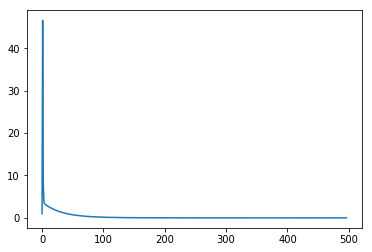

In [5]:
plt.plot(t_list,E_list)
plt.show()

In [6]:
w

tensor([[ 0.9082,  0.8596, -2.2865],
        [-0.8561, -1.7161, -0.9218],
        [ 1.0745,  0.8768, -1.5580],
        [-0.0399, -0.7392, -0.6932],
        [-0.0216, -0.6219, -0.9597],
        [ 0.2763,  0.3000, -0.4683],
        [-0.7136, -0.7781, -0.1032],
        [-1.1160, -0.5725, -1.7963],
        [-0.3560, -2.2262,  0.0763],
        [-0.2011, -1.7517, -1.0105]], requires_grad=True)